# 第 7 章　统计学与机器学习

## 第 3 节　Python 中的 Ridge 回归与 Lasso 回归




### 2. 环境准备

In [1]:
# 用于数值计算的库
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 用于绘图的库
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 用于估计统计模型的库 (部分版本会报出警告信息)
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 用于机器学习的库
from sklearn import linear_model

# 设置浮点数打印精度
%precision 3
# 在 Jupyter Notebook 里显示图形
%matplotlib inline

In [2]:
# 读入示例数据
X = pd.read_csv("7-3-1-large-data.csv")
X.head(3)

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_91,X_92,X_93,X_94,X_95,X_96,X_97,X_98,X_99,X_100
0,1.0000,0.5000,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,...,0.0110,0.0109,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100
1,0.5000,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,0.0909,...,0.0109,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100,0.0099
2,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,0.0909,0.0833,...,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100,0.0099,0.0098


### 3. 实现：标准化

In [3]:
# X_1 的均值
sp.mean(X.X_1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  


0.037

In [4]:
# 所有解释变量的均值
sp.mean(X, axis = 0).head(3)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  


X_1    0.037272
X_2    0.030649
X_3    0.027360
dtype: float64

In [5]:
# 标准化
X -= sp.mean(X, axis = 0)
X /= sp.std(X, ddof = 1, axis = 0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
# 检验
sp.mean(X, axis = 0).head(3).round(3)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  


X_1    0.0
X_2   -0.0
X_3   -0.0
dtype: float64

In [7]:
# 检验
sp.std(X, ddof = 1, axis = 0).head(3)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  


X_1    1.0
X_2    1.0
X_3    1.0
dtype: float64

### 4. 定义响应变量

In [8]:
# 定义响应变量

# 服从正态分布的噪声
np.random.seed(1)
noise =  sp.stats.norm.rvs(loc = 0, scale = 1, size = X.shape[0])

# 设正确的系数为 5, 定义响应变量
y =  X.X_1 * 5 + noise

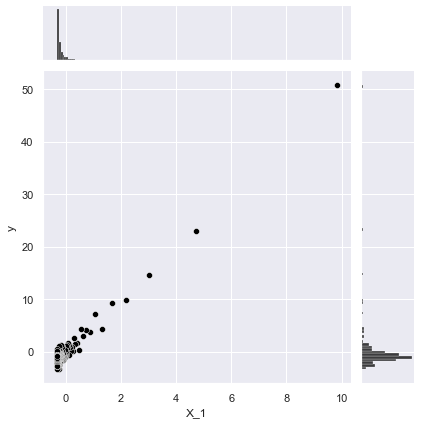

In [9]:
# 把响应变量和解释变量放在一起
large_data = pd.concat([pd.DataFrame({"y":y}), X], axis = 1)
# 绘制散点图
sns.jointplot(y = "y", x = "X_1", data = large_data,
              color = 'black')

### 5. 实现：普通最小二乘法

In [10]:
lm_statsmodels = sm.OLS(endog = y, exog = X).fit()
lm_statsmodels.params.head(3)

X_1     14.755018
X_2    -87.462851
X_3    211.743136
dtype: float64

### 6. 实现：使用 sklearn 实现线性回归

In [11]:
# 指定模型的结构
lm_sklearn = linear_model.LinearRegression()
# 指定数据来源并估计模型
lm_sklearn.fit(X, y)
# 所估计的参数 (数组型)
lm_sklearn.coef_

array([ 1.476e+01, -8.746e+01,  2.117e+02, -9.415e+01, -6.817e+01,
       -9.284e+01,  1.761e+00,  8.170e+01,  6.680e+01,  2.788e+01,
       -3.288e+01,  6.818e+01, -1.699e+01,  2.208e+01, -4.855e+01,
       -3.390e+01, -4.536e+01,  9.728e+00,  2.481e+01,  1.858e+00,
        1.599e+00, -2.838e+01,  6.477e+00, -5.980e+01,  3.532e+01,
       -1.302e+01,  4.108e+01, -4.303e+01,  5.247e+01,  1.920e+00,
        3.342e+01,  8.490e+00,  8.329e+00, -2.293e+01, -3.577e+01,
       -1.337e+01,  3.178e+01, -2.018e+01, -2.654e+01, -3.523e+01,
        1.927e+01,  4.823e+01, -1.655e+00,  5.749e-01, -1.893e+01,
        7.370e-01,  1.047e+01, -7.732e+00, -1.854e+00, -2.559e-01,
       -5.045e+00, -4.227e+00,  2.523e+01,  1.616e+01, -1.310e+01,
        6.455e+00, -1.332e+01, -2.291e+01, -1.202e+01,  7.745e+00,
        1.755e+01,  5.997e+00,  4.648e+00,  4.120e+00, -1.825e+00,
        5.366e+00,  4.546e+00, -2.598e+00, -4.091e+00,  7.496e+00,
        3.100e+01,  1.530e+01, -5.323e+00, -1.509e+01, -3.801e

### 7. 实现：Ridge 回归：惩罚项的影响

In [12]:
# 生成 50 个 α
n_alphas = 50
ridge_alphas = np.logspace(-2, 0.7, n_alphas)

In [13]:
# 参考
sp.log10(ridge_alphas)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.log10 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log10 instead
  


array([-2.   , -1.945, -1.89 , -1.835, -1.78 , -1.724, -1.669, -1.614,
       -1.559, -1.504, -1.449, -1.394, -1.339, -1.284, -1.229, -1.173,
       -1.118, -1.063, -1.008, -0.953, -0.898, -0.843, -0.788, -0.733,
       -0.678, -0.622, -0.567, -0.512, -0.457, -0.402, -0.347, -0.292,
       -0.237, -0.182, -0.127, -0.071, -0.016,  0.039,  0.094,  0.149,
        0.204,  0.259,  0.314,  0.369,  0.424,  0.48 ,  0.535,  0.59 ,
        0.645,  0.7  ])

In [14]:
# 对不同的 α 值进行 Ridge 回归

# 存放已估计的回归系数的列表
ridge_coefs = []
# 使用 for 循环多次估计 Ridge 回归
for a in ridge_alphas:
    ridge = linear_model.Ridge(alpha = a, fit_intercept = False)
    ridge.fit(X, y)
    ridge_coefs.append(ridge.coef_)

In [15]:
# 转换为数组
ridge_coefs = np.array(ridge_coefs)
ridge_coefs.shape

(50, 100)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.log10 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log10 instead
  


(-8.000, 10.500)

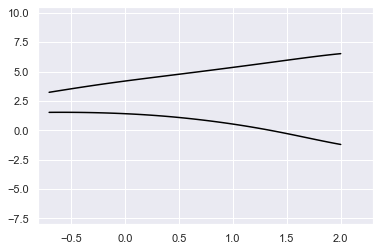

In [16]:
# 参考
log_alphas = -sp.log10(ridge_alphas)
plt.plot(log_alphas, ridge_coefs[::,0], color = 'black')
plt.plot(log_alphas, ridge_coefs[::,1], color = 'black')

plt.xlim([min(log_alphas)-0.1, max(log_alphas) + 0.3])
plt.ylim([-8, 10.5])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.log10 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log10 instead
  """


Text(0, 0.5, 'Coefficients')

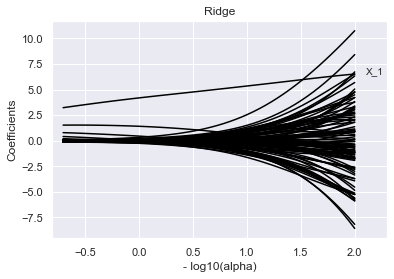

In [17]:
# 横轴为 -log10(α), 纵轴为系数的折线图
# 无需重复 100 次即可自动得到 100 条线

# 对 α 取对数
log_alphas = -sp.log10(ridge_alphas)
# 绘制曲线, 横轴为 -log10(α), 纵轴为系数
plt.plot(log_alphas, ridge_coefs, color = 'black')
# 标出解释变量 X_1 的系数
plt.text(max(log_alphas) + 0.1, np.array(ridge_coefs)[0,0], "X_1")
# X 轴的范围
plt.xlim([min(log_alphas) - 0.1, max(log_alphas) + 0.3])
# 轴标签
plt.title("Ridge")
plt.xlabel("- log10(alpha)")
plt.ylabel("Coefficients")

### 8. 实现：Ridge 回归：确定最佳正则化强度

In [18]:
# 通过交叉验证法求最佳 α
ridge_best = linear_model.RidgeCV(
    cv = 10, alphas = ridge_alphas, fit_intercept = False)
ridge_best.fit(X, y) 

# 最佳的 -log10(α)
-sp.log10(ridge_best.alpha_)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.log10 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log10 instead
  import sys


0.23673469387755094

In [19]:
# 最佳 α
ridge_best.alpha_

0.5797827717179138

In [20]:
# 取最佳 α 时的回归系数
ridge_best.coef_

array([ 4.463,  1.288,  0.293, -0.091, -0.201, -0.233, -0.215, -0.206,
       -0.145, -0.135, -0.155, -0.046, -0.097, -0.017, -0.11 , -0.012,
       -0.094,  0.013, -0.018, -0.031,  0.025, -0.029,  0.043, -0.087,
        0.127,  0.021,  0.055, -0.077,  0.141, -0.007,  0.099,  0.116,
       -0.044,  0.037, -0.034,  0.015,  0.123, -0.171, -0.007, -0.182,
        0.09 ,  0.222,  0.035, -0.032, -0.008,  0.025,  0.338, -0.193,
       -0.108,  0.212, -0.128, -0.246,  0.249,  0.128, -0.155,  0.27 ,
        0.03 , -0.165, -0.178,  0.158, -0.011,  0.013,  0.194,  0.134,
       -0.156, -0.018,  0.256,  0.223, -0.185,  0.006,  0.535,  0.181,
       -0.348, -0.123,  0.226, -0.043, -0.115, -0.053,  0.209,  0.189,
       -0.042, -0.205, -0.099,  0.059, -0.224,  0.15 , -0.039, -0.113,
        0.21 ,  0.012,  0.129, -0.032, -0.022, -0.229, -0.198,  0.245,
       -0.305, -0.396, -0.163,  0.164])

###  9. 实现：Lasso 回归：惩罚指标的影响

In [21]:
# 对不同的 α 值进行 Lasso 回归
lasso_alphas, lasso_coefs, _ = linear_model.lasso_path(
    X, y, fit_intercept = False)

ValueError: ('Unexpected parameters in params', dict_keys(['fit_intercept']))

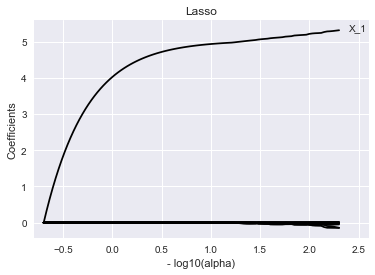

In [23]:
# Lasso 回归的解路径图

# 对 α 取对数
log_alphas = -sp.log10(lasso_alphas)
# 绘制曲线, 横轴为 -log10(α), 纵轴为系数
plt.plot(log_alphas, lasso_coefs.T, color = 'black')
# 标出解释变量 X_1 的系数
plt.text(max(log_alphas) + 0.1, lasso_coefs[0, -1], "X_1")
# X 轴的范围
plt.xlim([min(log_alphas)-0.1, max(log_alphas) + 0.3])
# 轴标签
plt.title("Lasso")
plt.xlabel("- log10(alpha)")
plt.ylabel("Coefficients")

###  10. 实现：Lasso 回归：确定最佳正则化强度

In [39]:
# 通过交叉验证法求最佳的 α
lasso_best = linear_model.LassoCV(
    cv = 10, alphas = lasso_alphas, fit_intercept = False)
lasso_best.fit(X, y)

# 最佳的 -log(α)
-sp.log10(lasso_best.alpha_)

2.301

In [40]:
# 最佳的 α
lasso_best.alpha_

0.005

In [41]:
# 取最佳的 α 时的回归系数
lasso_best.coef_

array([  5.336e+00,  -0.000e+00,  -0.000e+00,  -3.043e-01,  -4.121e-02,
        -0.000e+00,  -0.000e+00,  -0.000e+00,  -0.000e+00,  -0.000e+00,
        -0.000e+00,  -0.000e+00,  -0.000e+00,  -0.000e+00,  -0.000e+00,
        -0.000e+00,  -0.000e+00,  -0.000e+00,  -0.000e+00,  -0.000e+00,
        -0.000e+00,  -0.000e+00,  -0.000e+00,  -0.000e+00,  -0.000e+00,
        -0.000e+00,  -0.000e+00,  -0.000e+00,   0.000e+00,  -0.000e+00,
         0.000e+00,   0.000e+00,  -0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,  -0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.0